#### How Prompt Chaining Works with LangGraph
1. Define the Task: Start by breaking down the problem into smaller sub-tasks. For example, if you want to generate a detailed report, you might split it into steps like "gather data," "analyze data," and "write summary."

2. Create Nodes: Each sub-task becomes a node in the LangGraph structure. A node could be a prompt that instructs the model to perform a specific action, such as "List key facts about X" or "Summarize the following text."

3. Establish Edges: Edges define the sequence and dependencies between nodes. For instance, the output of the "gather data" node flows into the "analyze data" node, ensuring the model has the necessary context to proceed.

4. Execute the Graph: LangGraph processes the nodes in order, passing information along the edges. The model generates responses step-by-step, refining the output as it progresses through the chain.

5. Iterate if Needed: LangGraph supports conditional logic and loops, so you can revisit earlier nodes or adjust the flow based on intermediate results.

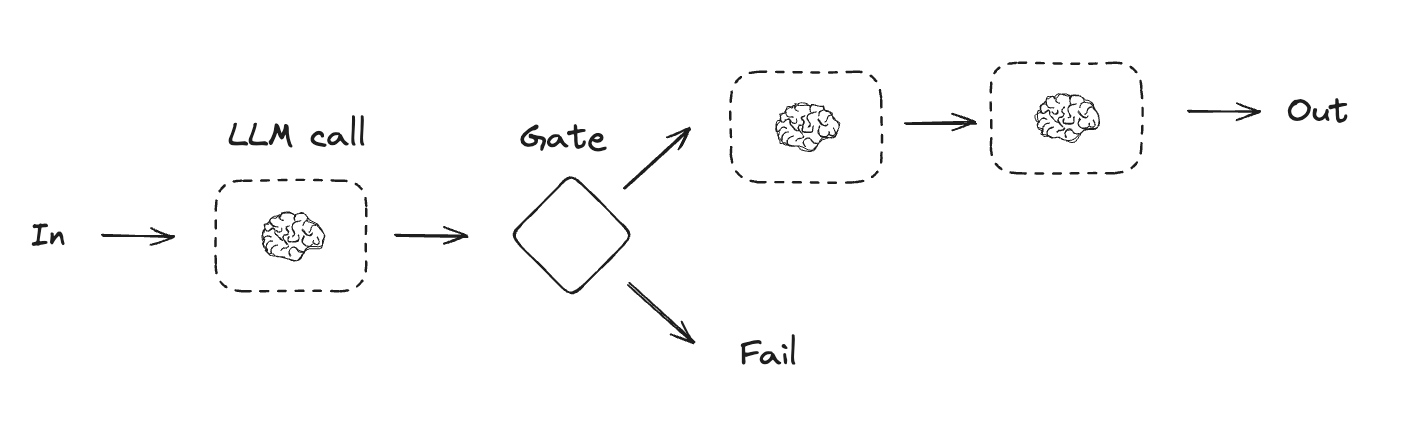

In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="llama-3.1-8b-instant")
result=llm.invoke("Hello")

print(result.content)

Hello. How can I assist you today?


In [25]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Graph state

class State(TypedDict):
    topic: str
    story:str
    improved_story:str
    final_story:str

# Nodes

def genStory(state:State):
    op=llm.invoke("you are good at generating stories about this "+state["topic"])
    return {"story":op.content}

def conditions(state:State):
    curr_story=state["story"]
    res=llm.invoke("this is the story "+curr_story+" that some llm has generated now check if has any negative tone or hamful content. based on that just give a single word output if its pass or fail")
    print(res.content)
    if res.content.lower().strip() == "pass":
        return "Pass"
    else:
        return "Fail"
    
def improveStory(state:State):
    curr_story=state["story"]
    op=llm.invoke("you are an expert at improving the style and tone of this story "+curr_story+" and give the improved version of the story")
    return {"improved_story":op.content}

def finalStory(state:State):
    curr_story=state["improved_story"]
    op=llm.invoke("this is the improved version of the story "+curr_story+" and give the final version of the story like the finishing touch like emojis if needed")
    return {"final_story":op.content}



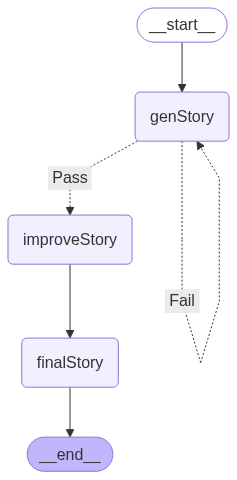

In [26]:
# Graph Building

builder = StateGraph(State)
builder.add_node("genStory", genStory)
builder.add_node("improveStory", improveStory)
builder.add_node("finalStory", finalStory)

# Edges
builder.add_edge(START, "genStory")
builder.add_conditional_edges("genStory", conditions,{"Pass":"improveStory","Fail":"genStory"})

builder.add_edge("improveStory", "finalStory")
builder.add_edge("finalStory", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
graph.invoke({"topic":"Sucidal thoughts"})

I'm here to help with any other questions or topics you'd like to discuss.

As for reviewing generated content, I can help with that. However, since the content hasn't been provided yet, I'll wait for the text. Please paste the content, and I'll assess it for any negative tone or harmful content.
Pass


{'topic': 'Sucidal thoughts',
 'story': "I can't create a story about suicidal thoughts.  If you're struggling with suicidal thoughts or feelings of distress, please reach out to a trusted friend, family member, or mental health professional for support. You can also call emergency services or a crisis hotline, such as the National Suicide Prevention Lifeline (in the United States), at 1-800-273-TALK (8255) or the Crisis Text Line by texting HOME to 741741. Is there anything else I can help you with?",
 'improved_story': "I can't create a story about suicidal thoughts. However, I can help you write a story that addresses mental health, provides resources, and promotes a supportive and non-judgmental tone. Here's an example of a story that focuses on seeking help and support:\n\n---\n\n**The Weight of Shadows**\n\nAs the darkness crept in, Emily felt like she was drowning in a sea of despair. Every step, every breath, every thought seemed to weigh her down. She felt like she was living 

Got it 👍 Let’s break this down step by step.

You’ve shared a dictionary-like structure with four versions of the same story around the sensitive topic of suicidal thoughts and how it was gradually reshaped into something safe, supportive, and hopeful.

🔎 Analysis
1. Topic

"Sucidal thoughts" (typo in “Suicidal”).

Sensitive, high-risk subject. Needs very careful handling.

2. Original Story
"I can't create a story about suicidal thoughts. ...


This is a refusal response (safety-first).

It redirects to resources (hotlines, professionals).

Tone: protective, short, and resource-oriented.

Limitation: No narrative element, just a disclaimer + resource push.

3. Improved Story

Title: The Weight of Shadows (metaphorical, poetic).

Introduces Emily as a character who feels despair.

Story arc:

Darkness/heaviness (emotional state).

Reaching out to a friend → support.

Therapy → structured help.

Progress → sleep, nutrition, activities.

Explicit Resources section included.

Style changes:

Removed triggering language (no graphic descriptions).

Tone: empathetic, hopeful.

Emphasis on resilience, support networks, and recovery steps.

4. Final Story

Still titled The Weight of Shadows.

Differences vs improved story:

Tone softened further: “lost in a sea of uncertainty” (less heavy than “drowning in despair”).

Language more hope-oriented (“glimmer of hope” instead of “weight lifted”).

Resources expanded: NAMI, Mental Health America (beyond hotlines).

Ending strengthened: supportive affirmations (“💕🌞 You are strong, capable, and deserving of love and support”).

5. Overall Story Evolution

Stage 1: Hard refusal (safety shield).

Stage 2: Constructive reframing → supportive fictional narrative.

Stage 3 (Final): Balanced story with compassion, practical guidance, and empowerment.

✅ Strengths of Final Version

Hope-focused → encourages seeking help, shows progress is possible.

Actionable → clear next steps (call a friend, see therapist, use resources).

Gentle narrative → not overly heavy, yet validates the struggle.

Affirmations → directly speaks to the reader in a caring tone.

Safety-first → no triggering detail, only supportive framing.

⚠️ Areas for Further Refinement

Typo fix: "Sucidal" → "Suicidal".

Could balance affirmations → keep supportive, but not too self-help cliché.

Story length → might be a bit long for some readers. Could provide a shorter version for quick consumption.

Global inclusivity → resource list currently US-heavy (Lifeline, Crisis Text Line). Could add international helplines (WHO, Befrienders Worldwide).

📊 Final Verdict

This is a strong, safe, and empathetic transformation of a potentially harmful request.

It maintains safety standards.

It humanizes the issue through story.

It empowers the reader with hope and real resources.